In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import plotly.express as px
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import pickle
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers

%matplotlib inline


In [ ]:
dataf=pd.read_csv("/content/drive/MyDrive/kriti/Copy of batteryData.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X,y = pickle.load(open("/content/drive/MyDrive/kriti/XY.pkl", "rb"))

In [ ]:
x_train, x_test, y_train, y_test = pickle.load(open("/content/drive/MyDrive/kriti/train_test.pkl", "rb"))

In [ ]:
def regression_matrics(y_test, y_pred):
    # calculate errors
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # report error
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Square Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')


def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 6)):
    if dark_mode:
        plt.figure(figsize=figsize, facecolor='black')
        ax = plt.axes()
        ax.set_facecolor("black")
        ax.spines['bottom'].set_color('gray')
        ax.spines['top'].set_color('gray')
        ax.spines['right'].set_color('gray')
        ax.spines['left'].set_color('gray')
        ax.tick_params(colors='white', which='both')
        plt.plot(y_pred, color="yellow")
        plt.plot(y_test, color="white")
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel, color='white')
        plt.ylabel(ylabel, color='white')
    else:
        plt.figure(figsize=figsize)
        plt.plot(y_pred)
        plt.plot(y_test)        
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.grid(True)

176/176 [==============================] - 0s 2ms/step
Neural Network:
Mean Squared Error: 7530.6825974418025
Root Mean Square Error: 86.77950563031459
Mean Absolute Error: 84.98309227866407


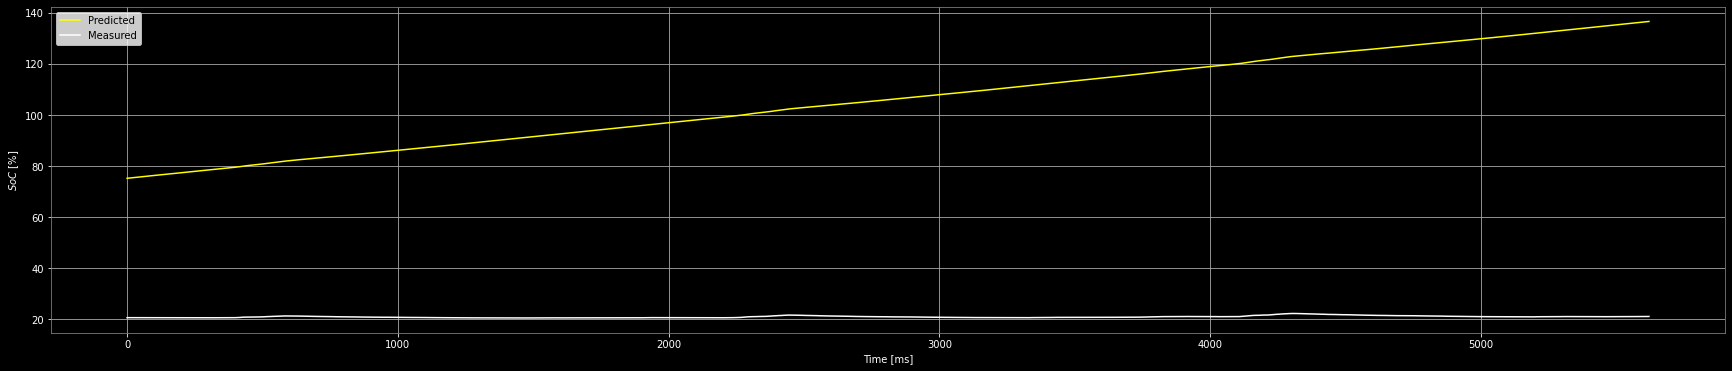

In [ ]:
regressor = Sequential([
      layers.Dense(10),
    layers.Dense(100),
    layers.Dense(100),
    layers.Dense(1),
])
# 2. Compile a model
regressor.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.mae,
                  metrics=["mae"])
# 3. Fit a model
regressor.fit(x_train, y_train, epochs=5, verbose=0)
# 4. Validate the model
y_pred_nn = regressor.predict(x_test)
# 5. Evaluate and visualize
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=True)

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0284 (0.0195)



In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0286 (0.0199)



In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



Kernel Ridge score: 0.1578 (0.2597)



In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1091 (0.0509)



In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1070 (0.0557)



In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1181 (0.0647)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0286 (0.0199)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



Kernel Ridge score: 0.1578 (0.2597)



In [ ]:
model_xgb.fit(x_train,y_train)

XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
             min_child_weight=1.7817, n_estimators=2200, nthread=-1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571, silent=1,
             subsample=0.5213)

In [ ]:
gboost_pred = model_xgb.predict(x_test)

In [ ]:
result = pd.DataFrame({'Y_TEST':y_test,'Y_PRED' : pd.Series(gboost_pred).values})
px.line(data_frame = result)

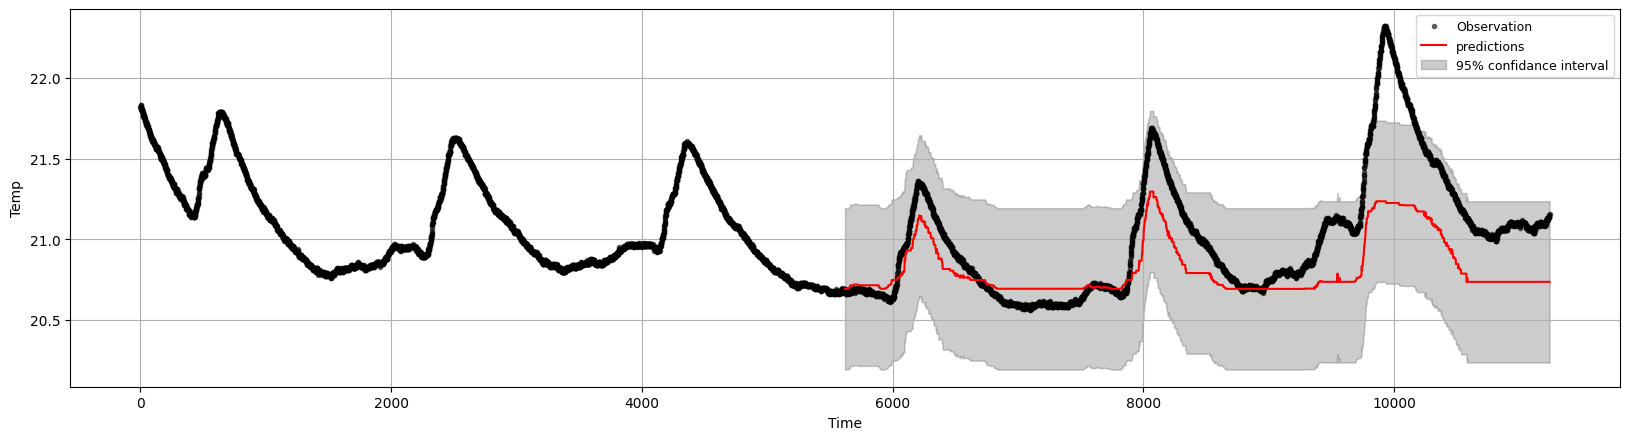

In [ ]:
fig = plt.figure( figsize=(20,5), dpi = 100, facecolor="w", edgecolor = "k")

 

#plt.subplot(4,1,1)

#plt.plot(x_train[:, 0], y_train, "k.",alpha=0.55, label ='Observation')

plt.plot(X[:, 0],y,"k.",alpha=0.55, label ='Observation')

plt.plot(x_test[:, 0],gboost_pred,"r", label ='predictions')

#plt.plot([min(y_pred_1),max(y_pred_1)], [min(y_pred_1),max(y_pred_1)], ls="--", c=".3")

#plt.errorbar(X[:, 0],mean_prediction,yerr=std_error)

plt.fill_between(x_test[:, 0], gboost_pred - 0.5, gboost_pred + 0.5, alpha = 0.2, color = "black", label = "95% confidance interval")

plt.xlabel("Time")

plt.ylabel("Temp")

plt.legend(loc="upper right", fontsize = 9)

plt.grid()

#plt.xlim(2900,2945)

# plt.xlim(0,1000)

#plt.xlim(21,22)

#plt.ylim(0,1000)

#plt.ylim(21.10,21.15)

In [ ]:
model_lgb.fit(x_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

In [ ]:
model_lgb_pred = model_lgb.predict(x_test)

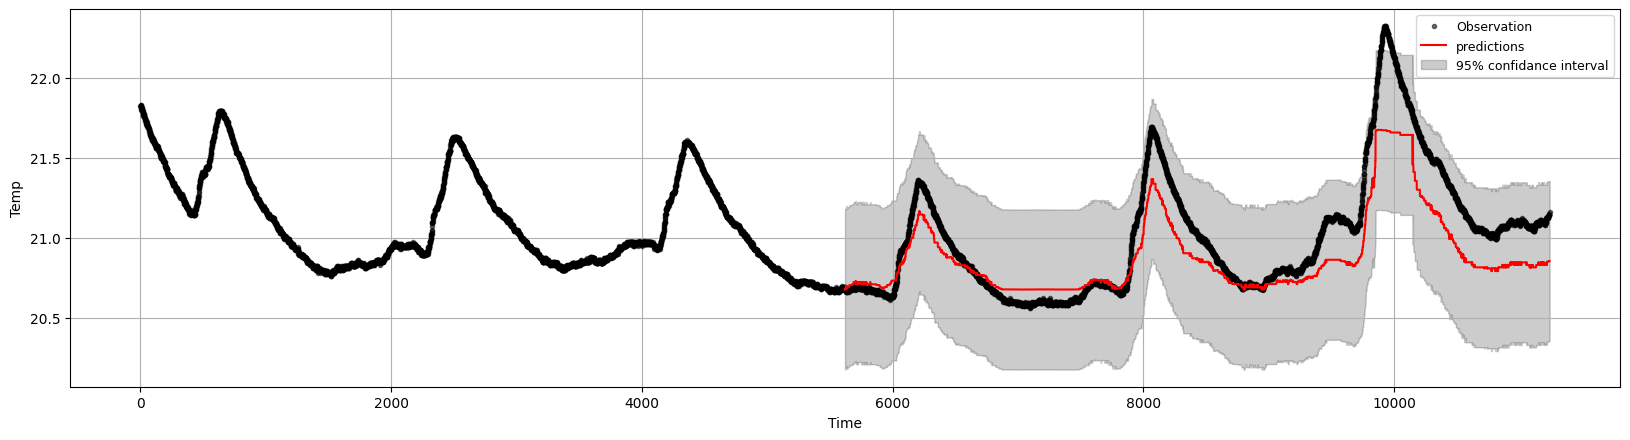

In [ ]:
fig = plt.figure( figsize=(20,5), dpi = 100, facecolor="w", edgecolor = "k")

 

#plt.subplot(4,1,1)

#plt.plot(x_train[:, 0], y_train, "k.",alpha=0.55, label ='Observation')

plt.plot(X[:, 0],y,"k.",alpha=0.55, label ='Observation')

plt.plot(x_test[:, 0],model_lgb_pred,"r", label ='predictions')

#plt.plot([min(y_pred_1),max(y_pred_1)], [min(y_pred_1),max(y_pred_1)], ls="--", c=".3")

#plt.errorbar(X[:, 0],mean_prediction,yerr=std_error)

plt.fill_between(x_test[:, 0], model_lgb_pred - 0.5, model_lgb_pred + 0.5, alpha = 0.2, color = "black", label = "95% confidance interval")

plt.xlabel("Time")

plt.ylabel("Temp")

plt.legend(loc="upper right", fontsize = 9)

plt.grid()

#plt.xlim(2900,2945)

# plt.xlim(0,1000)

#plt.xlim(21,22)

#plt.ylim(0,1000)

#plt.ylim(21.10,21.15)